## UNIVERSIDADE FEDERAL RURAL DO SEMI-ÁRIDO

## ANÁLISE DE ACIDENTES EM RODOVIAS FEDERAIS DO RN


**Trabalho Desenvolvido Por: Daniel da Silva Santos**

**Caraúbas - 2019**

Abaixo estão as importações de módulos necessários para a análise de dados.

In [1]:
# importações
import pandas as pd,matplotlib.pyplot as plt,os,warnings

Algumas configurações pouco relevantes para o trabalho.

In [2]:
# ignorar menssagens de warnings
warnings.filterwarnings('ignore')

#### 1. Seleção de Dados

O conjunto de dados obtidos no site do detran se encontram em uma pasta local datatran, o código abaixo encontra esses arquivos.

In [3]:
# lista de fontes de dados (arquivos .csv)
datatran_fontes = os.listdir('datatran')

Devido a razões de desempenho e ao propósito do trabalho, somente alguns atributos (listados abaixo) foram selecionados.

In [4]:
# somente colunas consideradas relevantes para o trabalho
colunas_a_estudar = ['data_inversa','uf','br','municipio','causa_acidente','tipo_acidente','classificacao_acidente','fase_dia','condicao_metereologica','tipo_pista','uso_solo']

O código abaixo carrega as fontes de dados e seleciona os registros ocorridos no estado do RN, de acordo com os atributos julgados relevantes.

In [5]:
# ler cada arquivo de fonte de dados, selecionar apenas registros ocorridos no RN com os atributos de interesse
datatran_rn_sep = [pd.read_csv('datatran/'+df,sep=';',encoding='ansi',usecols=colunas_a_estudar).query('uf=="RN"').drop('uf',axis=1) for df in datatran_fontes]

#### 2. Pré-processamento

Os conjuntos de dados estão separados de acordo com o ano, o código abaixo integra, em um único *Data Frame*, todos os registros. 

In [6]:
# integração de dados
datatran_rn = pd.concat(datatran_rn_sep,ignore_index=True)

O comando seguinte exibe os primeiros registros do conjunto de dado integrado.

In [7]:
# observar início do conjunto de dados
datatran_rn.head()

,data_inversa,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,uso_solo
0,01/01/2007,101,EXTREMOZ,Falta de atenção,Saída de Pista,Sem Vítimas,Plena noite,Ceu Claro,Simples,Rural
1,01/01/2007,304,MACAIBA,Outras,Colisão com objeto móvel,Com Vítimas Feridas,Plena noite,Ceu Claro,Simples,Rural
2,01/01/2007,101,SAO GONCALO DO AMARANTE,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Anoitecer,Ceu Claro,Dupla,Urbano
3,01/01/2007,101,PARNAMIRIM,Ingestão de álcool,Colisão traseira,Sem Vítimas,Pleno dia,Ceu Claro,Dupla,Rural
4,01/01/2007,304,MOSSORO,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,Ceu Claro,Simples,Urbano


A quantidade de registos (linhas) e de atributos (colunas) é obtido como se segue.

In [8]:
# quantidade de registros e de atributos
registros,atributos = datatran_rn.shape

print('registros: ',registros,' atributos: ',atributos)

registros:  35809  atributos:  10


Verificar em quais atributos há valores nulos (não presentes), como se pode observar, aparentemente, apenas a coluna *br* apresenta esse problema.

In [9]:
# verificar valores nulos
datatran_rn.isnull().any()

data_inversa              False
br                         True
municipio                 False
causa_acidente            False
tipo_acidente             False
classificacao_acidente    False
fase_dia                  False
condicao_metereologica    False
tipo_pista                False
uso_solo                  False
dtype: bool

O atributo *data_inversa* é muito importante para uma análise histórica dos acidentes, felizmente, não há valores ausentes nessa coluna, por isso, não se encontra impasse na manipulção desse atributo, contudo, para simplificar ainda mais esse processo, o comando abaixo foi executado, o qual converte os valores cronológicos em objetos facilmente manipuláveis.

In [10]:
# converter coluna 'data_inversa' para um objeto que o pandas manipula facilmente
datatran_rn['data_inversa']=pd.to_datetime(datatran_rn['data_inversa'],dayfirst=True)

Agora, extrair informações como dia, mês e ano do acidente se torna fácil a partir da coluna *data_inversa*. 

In [11]:
# dias da semana em que os acidentes ocorreram
dias = datatran_rn['data_inversa'].dt.day_name(locale='pt').rename('dia')

# meses em que os acidentes ocorreram
meses = datatran_rn['data_inversa'].dt.month_name(locale='pt').rename('mes')

# anos em que os acidentes ocorreram
anos = datatran_rn['data_inversa'].dt.year.rename('ano').astype('str')

O código abaixo remove o atributo *data_inversa* (que se torna obsoleta) e insere dias, meses e anos de ocorrência.

In [12]:
# remover coluna 'data_inversa'
datatran_rn.drop('data_inversa',axis=1,inplace=True)

# inserir colunas dia, mes, ano
datatran_rn =pd.concat([anos,meses,dias,datatran_rn],axis=1)

O comando abaixo, novamente, exibe os primeiros registros do *Data Frame* principal, percebe-se a presença das novas colunas.

In [13]:
datatran_rn.head()

,ano,mes,dia,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,uso_solo
0,2007,Janeiro,Segunda-feira,101,EXTREMOZ,Falta de atenção,Saída de Pista,Sem Vítimas,Plena noite,Ceu Claro,Simples,Rural
1,2007,Janeiro,Segunda-feira,304,MACAIBA,Outras,Colisão com objeto móvel,Com Vítimas Feridas,Plena noite,Ceu Claro,Simples,Rural
2,2007,Janeiro,Segunda-feira,101,SAO GONCALO DO AMARANTE,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Anoitecer,Ceu Claro,Dupla,Urbano
3,2007,Janeiro,Segunda-feira,101,PARNAMIRIM,Ingestão de álcool,Colisão traseira,Sem Vítimas,Pleno dia,Ceu Claro,Dupla,Rural
4,2007,Janeiro,Segunda-feira,304,MOSSORO,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,Ceu Claro,Simples,Urbano


Alguns registros, por algum motivo, não indicam a BR do estado na qual ocorreu o acidente, isso pode ser um grande problema para análise, felizmente, o número de registros sem essa informação é mínimo - como se pode observar abaixo.

In [14]:
# registros sem informação da br
br_nulos = datatran_rn[datatran_rn['br'].isnull()]

# exibir registros
br_nulos

,ano,mes,dia,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,uso_solo
33541,2017,Junho,Domingo,NaN,MOSSORO ...,Defeito na Via ...,Colisão transversal ...,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Sim
33859,2017,Agosto,Domingo,NaN,MOSSORO ...,Ingestão de Álcool ...,Colisão com objeto em movimento ...,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Não
34037,2017,Outubro,Sábado,NaN,EXTREMOZ ...,Falta de Atenção à Condução ...,Colisão frontal ...,Com Vítimas Feridas,Pleno dia,Céu Claro,Dupla,Não
34508,2018,Fevereiro,Sexta-feira,NaN,AUGUSTO SEVERO,Defeito na Via,Colisão com objeto estático,Com Vítimas Feridas,Pleno dia,Céu Claro,Simples,Sim
34832,2018,Abril,Quinta-feira,NaN,JOAO CAMARA,Defeito na Via,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Sim


Como a quantidade de elementos com ausência do atributo *br* é muito pequena, decidiu-se atribuir manualmente esses valores. Obviamente, o melhor recurso disponível na fonte de dados para estimar esses valores ausentes é o atributo dos municípios. Desse modo, os campos faltosos foram preenchidos com o número da *br* com maior quantidade de registros em cada município (moda).

In [15]:
# calcular modas da quantidade de ocorrências em cada município.
br_modas = datatran_rn['br'].groupby(datatran_rn['municipio']).agg(pd.Series.mode)

# receber modas dos municípios presentes nos registros com dados faltosos
br_nulos_modas = br_modas[br_nulos['municipio']]

# exibir modas
br_nulos_modas

# modificar índice
br_nulos_modas.index = br_nulos.index

# substituir valores nulos
datatran_rn['br'].fillna(br_nulos_modas,inplace=True)

Pode-se observar que agora não é mais encontrado valores ausentes na coluna *br*.

In [16]:
datatran_rn.isnull().any()

ano                       False
mes                       False
dia                       False
br                        False
municipio                 False
causa_acidente            False
tipo_acidente             False
classificacao_acidente    False
fase_dia                  False
condicao_metereologica    False
tipo_pista                False
uso_solo                  False
dtype: bool

Deseja-se verficiar quais são as rodovias federais do Rio Grande do Norte presentes nos registros, a seguinte linha realiza isso.

In [17]:
# verificar quais rodovias estão envolvidas nos acidentes
datatran_rn['br'].unique()

array([101, 304, 226, 110, 406, 405, 427, '304', '226', '406', '101',
       '405', '427', '110', '343', '501', 268, 104.0], dtype=object)

Como se observa, as classes - número da rodovia - não estão bem formatadas, uma inclusive possui ponto flutuante como se fosse um valor decimal, algumas são consideradas números outras cadeias de caracteres. Necessita-se, portanto, padronizar essas classes, os próximos comandos resolverão isso.

In [18]:
# considerar, inicialmente, a coluna como um conjunto de valores inteiros
datatran_rn['br'] = datatran_rn['br'].astype('int')

# em seguida, convertê-los como cadeias de caracteres
datatran_rn['br'] = datatran_rn['br'].astype('str')

# observar resultado
datatran_rn['br'].unique()

array(['101', '304', '226', '110', '406', '405', '427', '343', '501',
       '268', '104'], dtype=object)

Nota-se, ainda sobre a coluna *br*, que há classes inconsistentes, no estado do Rio Grande do Norte estão presentes apenas 9 rodovias federais, não 11, além disso, segundo o DNIT, não existe uma **BR-501** e as **BR-268**, **BR-343** não atravessam o território potiguar.

In [19]:
# registros com valores inconsistentes
br_inconsistentes = datatran_rn[datatran_rn['br'].isin(['268','343','501'])]

# exibir esses registros
br_inconsistentes

,ano,mes,dia,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,uso_solo
18973,2012,Maio,Sábado,343,MOSSORO,Outras,Atropelamento de pessoa,Com Vítimas Feridas,Pleno dia,Sol,Dupla,Urbano
19230,2012,Julho,Domingo,501,NATAL,Desobediência à sinalização,Colisão Transversal,Sem Vítimas,Plena noite,Nublado,Dupla,Urbano
23313,2013,Julho,Sábado,268,CEARA-MIRIM,Outras,Colisão frontal,Com Vítimas Feridas,Plena noite,Ceu Claro,Simples,Rural


Os valores inconsistentes para o atributo *br* foram tratados como se fossem dados incompletos, isto é nulos, portanto, utilizou-se novamente a moda estatística para estimar esses valores.

In [20]:
# receber modas dos municípios presentes nos registros com dados inconsistentes
br_inconsistentes_modas = br_modas[br_inconsistentes['municipio']]

# exibir modas
br_inconsistentes_modas

# modificar index
br_inconsistentes_modas.index = br_inconsistentes.index

# substituir valores inconsistentes
datatran_rn.loc[br_inconsistentes.index.array,'br'] = br_inconsistentes_modas.astype('str')

# observar resultado novamente
datatran_rn['br'].unique()

array(['101', '304', '226', '110', '406', '405', '427', '104'],
      dtype=object)

Para padronizar os demais atributos, a linha abaixo foi executada, como antes, isso evita erros.

In [21]:
# padronizar todos os atributos exceto os já tratados ano,mes,dia,br
datatran_rn.loc[:,'municipio':'uso_solo'] = datatran_rn.loc[:,'municipio':'uso_solo'].applymap(str.title).applymap(str.strip)

Verificar municípios presentes nos registros.

In [22]:
# exibir municípios para verificar se estão padronizados
datatran_rn['municipio'].sort_values().unique()

array(['Acari', 'Acu', 'Almino Afonso', 'Angicos', 'Antonio Martins',
       'Apodi', 'Areia Branca', 'Ares', 'Assu', 'Augusto Severo',
       'Baia Formosa', 'Bom Jesus', 'Caicara Do Norte',
       'Caicara Do Rio Do Vento', 'Caico', 'Campo Grande',
       'Campo Redondo', 'Canguaretama', 'Ceara-Mirim', 'Currais Novos',
       'Extremoz', 'Felipe Guerra', 'Fernando Pedroza', 'Florania',
       'Goianinha', 'Governador Dix-Sept Rosado', 'Guamare',
       'Ielmo Marinho', 'Ipanguacu', 'Itaja', 'Itau', 'Jandaira',
       'Janduis', 'Jardim Do Serido', 'Joao Camara', 'Jose Da Penha',
       'Jucurutu', 'Lajes', 'Lajes Pintadas', 'Luis Gomes', 'Macaiba',
       'Macau', 'Major Sales', 'Marcelino Vieira', 'Martins',
       'Maxaranguape', 'Messias Targino', 'Mossoro', 'Natal',
       'Nisia Floresta', 'Parau', 'Parnamirim', 'Patu', 'Pau Dos Ferros',
       'Pedro Avelino', 'Poco Branco', 'Rafael Fernandes',
       'Riacho De Santana', 'Riachuelo', 'Rio Do Fogo',
       'Rodolfo Fernandes', 

Verificar as causas de acidentes atribuidas as ocorrências.

In [23]:
# exibir as causas de acidentes compiladas a partir dos dados
datatran_rn['causa_acidente'].sort_values().unique()

array(['Agressão Externa', 'Animais Na Pista',
       'Avarias E/Ou Desgaste Excessivo No Pneu',
       'Carga Excessiva E/Ou Mal Acondicionada', 'Condutor Dormindo',
       'Defeito Mecânico Em Veículo', 'Defeito Mecânico No Veículo',
       'Defeito Na Via',
       'Deficiência Ou Não Acionamento Do Sistema De Iluminação/Sinalização Do Veículo',
       'Desobediência À Sinalização',
       'Desobediência Às Normas De Trânsito Pelo Condutor',
       'Desobediência Às Normas De Trânsito Pelo Pedestre', 'Dormindo',
       'Falta De Atenção', 'Falta De Atenção Do Pedestre',
       'Falta De Atenção À Condução', 'Fenômenos Da Natureza',
       'Ingestão De Substâncias Psicoativas', 'Ingestão De Álcool',
       'Ingestão De Álcool E/Ou Substâncias Psicoativas Pelo Pedestre',
       'Mal Súbito', 'Não Guardar Distância De Segurança',
       'Objeto Estático Sobre O Leito Carroçável', 'Outras',
       'Pista Escorregadia', 'Restrição De Visibilidade',
       'Sinalização Da Via Insuficiente 

Observar os tipos de acidentes ocorridos.

In [24]:
# exibir os tipos de acidentes
datatran_rn['tipo_acidente'].sort_values().unique()

array(['Atropelamento De Animal', 'Atropelamento De Pedestre',
       'Atropelamento De Pessoa', 'Capotamento', 'Colisão Com Bicicleta',
       'Colisão Com Objeto Em Movimento', 'Colisão Com Objeto Estático',
       'Colisão Com Objeto Fixo', 'Colisão Com Objeto Móvel',
       'Colisão Frontal', 'Colisão Lateral', 'Colisão Transversal',
       'Colisão Traseira', 'Danos Eventuais', 'Derramamento De Carga',
       'Engavetamento', 'Incêndio',
       'Queda De Motocicleta / Bicicleta / Veículo',
       'Queda De Ocupante De Veículo', 'Saída De Leito Carroçável',
       'Saída De Pista', 'Tombamento'], dtype=object)

Observar as classificações atribuidas aos acidentes.

In [25]:
# exibir classificações dos acidentes
datatran_rn['classificacao_acidente'].sort_values().unique()

array(['Com Vítimas Fatais', 'Com Vítimas Feridas', 'Ignorado',
       'Sem Vítimas'], dtype=object)

Horários categóricos nos quais os acidentes ocorreram.

In [26]:
# exibir as fases do dias
datatran_rn['fase_dia'].sort_values().unique()

array(['(Null)', 'Amanhecer', 'Anoitecer', 'Plena Noite', 'Pleno Dia'],
      dtype=object)

Percebe-se que mesmo não detectado anteriormente, a coluna *fase_dia* possui um valor nulo, provavelmente isso ocorreu pois esse dado foi considerado uma cadeia de caracteres. Pode-se observar que somente uma linha possui esse atrbuto nulo, além disso, na fonte de dados original há o horário exato em que o acidente ocorreu (**14:50 h**), dessa maneira é fácil a esse elemento atribuir um valor manualmente como **PLENO DIA**.

In [27]:
# definir valor com fase de dia nulo como 'Pleno Dia'
datatran_rn.loc[datatran_rn['fase_dia']=='(Null)','fase_dia'] = 'Pleno Dia'

# observar o resultado
datatran_rn['fase_dia'].sort_values().unique()

array(['Amanhecer', 'Anoitecer', 'Plena Noite', 'Pleno Dia'], dtype=object)

Observar as condicões metereológicas sobre as quais os acidentes ocorreram

In [28]:
# exibir condições metereológicas dos acidentes
datatran_rn['condicao_metereologica'].sort_values().unique()

array(['(Null)', 'Ceu Claro', 'Chuva', 'Céu Claro', 'Garoa/Chuvisco',
       'Granizo', 'Ignorada', 'Ignorado', 'Nevoeiro/Neblina', 'Nublado',
       'Sol', 'Vento'], dtype=object)

O mesmo problema se apresenta novamente, há valores ausentes no atributo considerado, além disso, houve acidentes que ocorreram sob a codição metereológica **GRANIZO**, considerando o clima do estado do RN é possível considerar as ocorrências dessa classe como dados ruidosos. O comando abaixo exibe os registros com essas classificações, como se pode observar apenas dois foram encontradas, como é um grupo muito pequeno, foi atribuida manualmente a essas linha a classificação **IGNORADO**.

In [29]:
# exibir linhas com condição metereológica nula ou granizo
datatran_rn[datatran_rn['condicao_metereologica'].isin(['(Null)','Granizo'])]

,ano,mes,dia,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,uso_solo
27118,2014,Julho,Segunda-feira,226,Currais Novos,Outras,Atropelamento De Pessoa,Com Vítimas Feridas,Pleno Dia,Granizo,Dupla,Urbano
30901,2015,Outubro,Quarta-feira,110,Mossoro,Outras,Queda De Motocicleta / Bicicleta / Veículo,Com Vítimas Feridas,Plena Noite,(Null),Dupla,Urbano


In [30]:
# atribuir classe 'Ignorado' a esses registros
datatran_rn.loc[datatran_rn['condicao_metereologica'].isin(['(Null)','Granizo']),'condicao_metereologica'] = 'Ignorado'

Percebe-se, ainda, que há outros problemas no atributo de condição metereológica, os valores **CEU CLARO** e **CÉU CLARO** são considerados distintos somente devido ao acento além disso, existe também um classe **IGNORADA**, a linha a seguir resolve essa situação.

In [31]:
# trocar valores problemáticos
datatran_rn['condicao_metereologica'].replace(['Ceu Claro','Ignorada'],['Céu Claro','Ignorado'],inplace=True)

# verificar se os problemas foram corrigidos
datatran_rn['condicao_metereologica'].sort_values().unique()

array(['Chuva', 'Céu Claro', 'Garoa/Chuvisco', 'Ignorado',
       'Nevoeiro/Neblina', 'Nublado', 'Sol', 'Vento'], dtype=object)

Examinar os tipos de pistas

In [32]:
datatran_rn['tipo_pista'].unique()

array(['Simples', 'Dupla', 'Múltipla'], dtype=object)

O atributo **uso_solo** indica se o acidente ocorreu com solo **URBANO** ou **RURAL**, alguns registros possuem o valor **SIM** para indicar se o acidente ocorreu em solo urbano e, logicamente, **NÃO**, para o rural. Os próximos comandos exibe isso e em seguida padroniza esses dados.

In [33]:
# exibir valores possíveis
datatran_rn['uso_solo'].unique()

array(['Rural', 'Urbano', 'Não', 'Sim'], dtype=object)

In [34]:
# padronizar valores
datatran_rn['uso_solo'].replace(['Sim','Não'],['Urbano','Rural'],inplace=True)

# exibir resultado
datatran_rn['uso_solo'].unique()

array(['Rural', 'Urbano'], dtype=object)

O próximo código exibe novamente os primeiros registros presentes no *Data Frame*, agora processado.

In [35]:
# exibir linhas iniciais de registros após todo processamento
datatran_rn.head()

,ano,mes,dia,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,uso_solo
0,2007,Janeiro,Segunda-feira,101,Extremoz,Falta De Atenção,Saída De Pista,Sem Vítimas,Plena Noite,Céu Claro,Simples,Rural
1,2007,Janeiro,Segunda-feira,304,Macaiba,Outras,Colisão Com Objeto Móvel,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Rural
2,2007,Janeiro,Segunda-feira,101,Sao Goncalo Do Amarante,Não Guardar Distância De Segurança,Colisão Traseira,Sem Vítimas,Anoitecer,Céu Claro,Dupla,Urbano
3,2007,Janeiro,Segunda-feira,101,Parnamirim,Ingestão De Álcool,Colisão Traseira,Sem Vítimas,Pleno Dia,Céu Claro,Dupla,Rural
4,2007,Janeiro,Segunda-feira,304,Mossoro,Não Guardar Distância De Segurança,Colisão Traseira,Sem Vítimas,Pleno Dia,Céu Claro,Simples,Urbano


Para salvar esse conjunto de dados processado, o bloco abaixo foi executado, um arquivo 'datatran-rn.csv' será criado.

In [37]:
# salvar conjunto de dados processados como um arquivo .csv
datatran_rn.to_csv('datatran-rn.csv',index=False)

#### 3. Exploração

O arquivo *datatran_rn.csv* contém os dados devidamente processados, procedimento realizado na seção de [pré-processamento](#2.-Pr%C3%A9-processamento).

In [39]:
# ler arquivo com dados processados
datatran_rn = pd.read_csv('datatran-rn.csv')

Exibir primeiros registros da fonte de dados pré-processado.

In [40]:
# exibir primeiros resultados
datatran_rn.head()

,ano,mes,dia,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,uso_solo
0,2007,Janeiro,Segunda-feira,101,Extremoz,Falta De Atenção,Saída De Pista,Sem Vítimas,Plena Noite,Céu Claro,Simples,Rural
1,2007,Janeiro,Segunda-feira,304,Macaiba,Outras,Colisão Com Objeto Móvel,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Rural
2,2007,Janeiro,Segunda-feira,101,Sao Goncalo Do Amarante,Não Guardar Distância De Segurança,Colisão Traseira,Sem Vítimas,Anoitecer,Céu Claro,Dupla,Urbano
3,2007,Janeiro,Segunda-feira,101,Parnamirim,Ingestão De Álcool,Colisão Traseira,Sem Vítimas,Pleno Dia,Céu Claro,Dupla,Rural
4,2007,Janeiro,Segunda-feira,304,Mossoro,Não Guardar Distância De Segurança,Colisão Traseira,Sem Vítimas,Pleno Dia,Céu Claro,Simples,Urbano


Quantidade numérica de acidentes ocorridos em todo o RN em cada ano a partir de 2007.

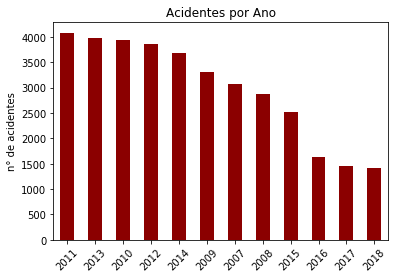

In [41]:
# plotar gráfico de barras
datatran_rn['ano'].value_counts().plot(kind='bar',color='darkred',title='Acidentes por Ano',rot='45').set(ylabel='n° de acidentes');

Tabela com a quantidade de acidentes registrados ocorridos em cada mês de cada ano

In [42]:
# construir tabela
acidentes_ano_mes = pd.crosstab(datatran_rn['mes'].astype(pd.CategoricalDtype(datatran_rn['mes'].unique(),ordered=True)),datatran_rn['ano'])

# exibir tabela
acidentes_ano_mes

ano,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
mes,,,,,,,,,,,,
Janeiro,262,241,251,319,361,354,331,328,257,167,105,113
Fevereiro,219,267,254,262,298,332,299,271,239,126,107,128
Março,223,275,230,338,323,293,370,334,290,128,133,148
Abril,253,301,263,271,342,339,330,326,284,123,140,118
Maio,221,290,293,351,351,330,310,308,273,128,123,121
Junho,246,97,248,291,295,287,303,270,269,138,119,102
Julho,223,96,307,311,351,313,315,263,153,165,114,108
Agosto,274,242,290,331,367,306,337,329,144,137,111,127
Setembro,266,237,284,369,319,335,317,315,148,137,114,110


O bloco seguinte realiza a plotagem da tabela anterior em forma de gráfico de barras para cada ano.

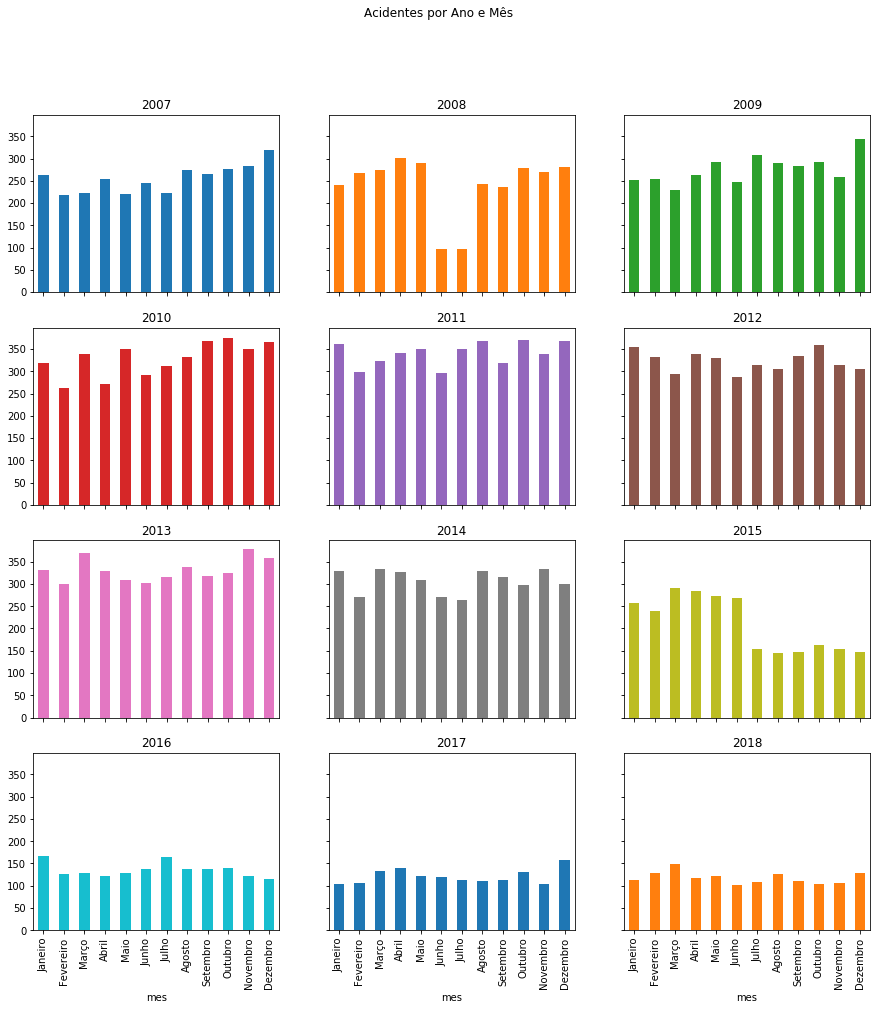

In [43]:
# construir plotagem
acidentes_ano_mes.plot(kind='bar',subplots=True,sharey=True,layout=(4,3), figsize=(15,15), legend=False,title='Acidentes por Ano e Mês');

Construir um gráfico de setores que indica como os acidentes estão distribuidos em relação aos dias da semana.

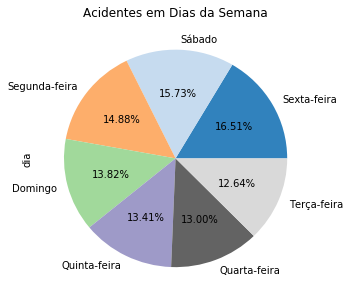

In [47]:
# plotagem do gráfico pizza
datatran_rn['dia'].value_counts().plot(kind='pie',figsize=(5,5),title='Acidentes em Dias da Semana',autopct='%.2f%%',colormap='tab20c');

Explorar ocorrências por municípios e rodovias.

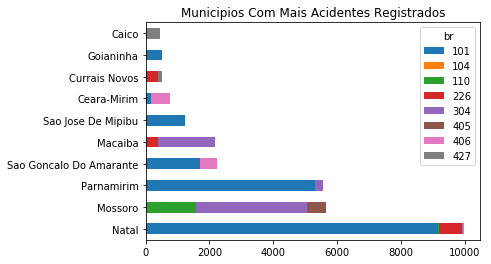

In [48]:
# municipios com maior número de ocorrências registradas
municipios_acidentes = datatran_rn['municipio'].value_counts().head(10)

# realizar plotagem
pd.crosstab(datatran_rn['municipio'],datatran_rn['br']).loc[municipios_acidentes.index].plot(kind='barh',stacked=True,title='Municipios Com Mais Acidentes Registrados');

Observar as causas mais de acidentes mais importantes

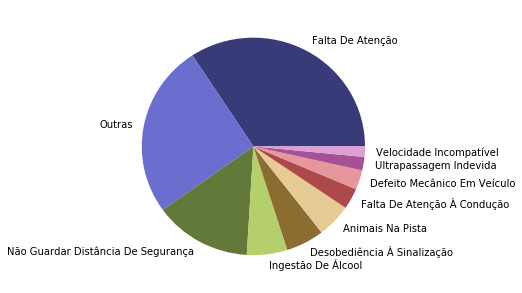

In [49]:
# plotar gráfico de setores
datatran_rn['causa_acidente'].value_counts().head(10).rename('').plot(kind='pie',figsize=(5,5),colormap='tab20b');

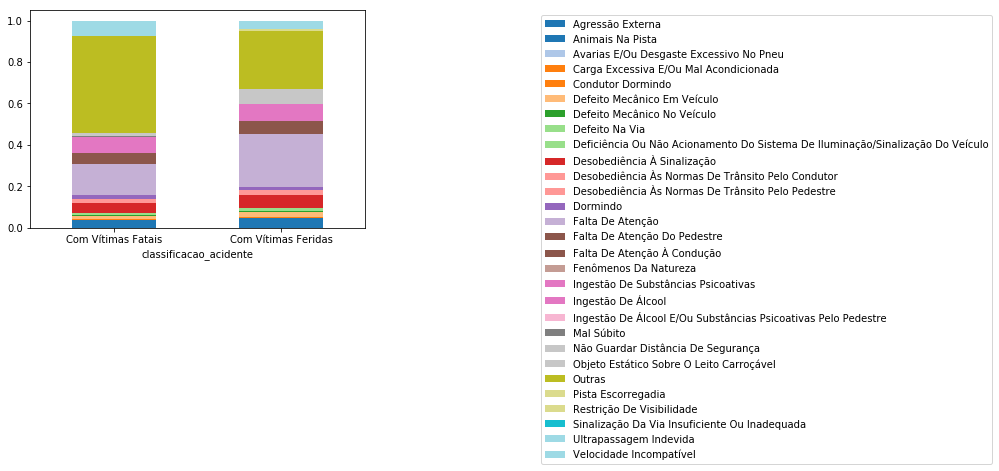

In [50]:
plt = pd.crosstab(datatran_rn['classificacao_acidente'],datatran_rn['causa_acidente']).apply(lambda r: r/r.sum(), axis=1).iloc[0:2].plot(kind='bar',rot=360,stacked=True,colormap='tab20');
plt.legend(bbox_to_anchor = (1.51, 1));

Estudar relação entre o tipo de acidente e classificação.

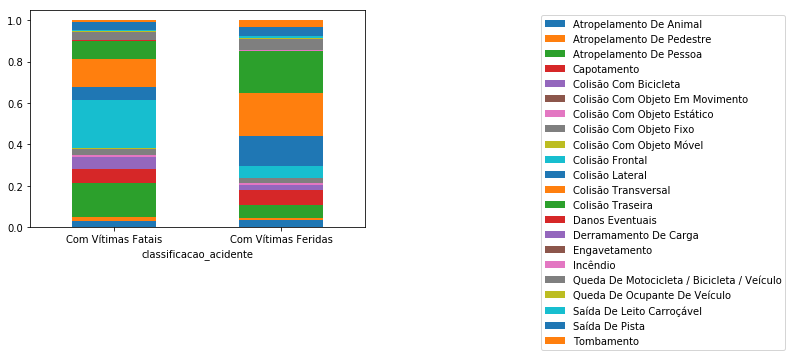

In [51]:
plt = pd.crosstab(datatran_rn['classificacao_acidente'],datatran_rn['tipo_acidente']).apply(lambda r: r/r.sum(), axis=1).iloc[0:2].plot(kind='bar',rot=360,stacked=True);
plt.legend(bbox_to_anchor = (1.51, 1));

Comportamento cronológico das classificações dos acidentes.

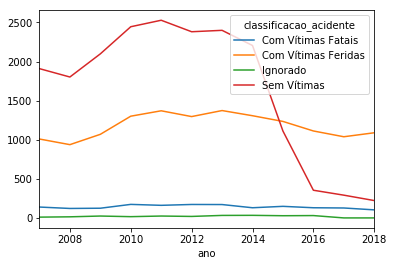

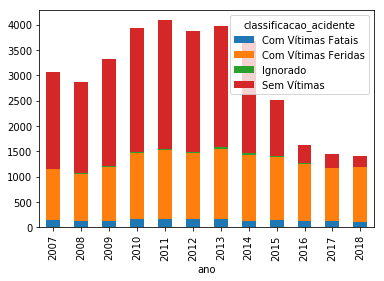

In [52]:
# plotagem de gráfico linear
pd.crosstab(datatran_rn['ano'],datatran_rn['classificacao_acidente']).plot(kind='line');

# plotagem de gráfico de barras
pd.crosstab(datatran_rn['ano'],datatran_rn['classificacao_acidente']).plot(kind='bar',stacked=True);